In [24]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
from __future__ import division
import nltk
import matplotlib
from nltk.book import *
from nltk.util import bigrams
import pandas as pd


In [21]:
import re
emotions_str = r"""
    (?:
        [:=;] # 眼睛
        [oO\-]? # ⿐鼻⼦子
        [D\)\]\(\]/\\OpP] # 嘴
    )"""
regex_str = [
    emotions_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @某⼈人
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # 话题标签
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',
    # URLs
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # 数字
    r"(?:[a-z][a-z'\-_]+[a-z])", # 含有 - 和 ‘ 的单词
    r'(?:[\w_]+)', # 其他
    r'(?:\S)' # 其他
    ]

tokens_re = re.compile(r'('+'|'.join(regex_str)+')',re.VERBOSE | re.IGNORECASE)#所有特殊字符的匹配式
emotion_re = re.compile(r'^'+emotions_str+'$',re.VERBOSE | re.IGNORECASE)#表情符号的匹配式

def tokenize(s):
    return tokens_re.findall(s) #匹配出所有特殊字符

def preprocess(s,lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emotion_re.search(token) else token.lower() for token in tokens]#对非表情符号进行小写处理
    return tokens#返回所有特殊字符

In [27]:
text1 = 'And it\'s made me realize that even though there were times when I wanted to say "Fuck This", I\'m not regretting playing Strider on Hard'
tokens = nltk.word_tokenize(text1)
processed_text = preprocess(text1)

In [29]:
from nltk.corpus import stopwords
filtered_words = [word for word in processed_text if word not in stopwords.words('english')]
filtered_words = [word for word in processed_text if word not in stopwords.words('spanish')]
print(filtered_words)

['And', "it's", 'made', 'realize', 'that', 'even', 'though', 'there', 'were', 'times', 'when', 'I', 'wanted', 'to', 'say', '"', 'Fuck', 'This', '"', ',', "I'm", 'not', 'regretting', 'playing', 'Strider', 'on', 'Hard']


bAnd
made
realize
even
though
times
I
wanted
say
"
Fuck
This
,
I'm
regretting
playing
Strider
Hard


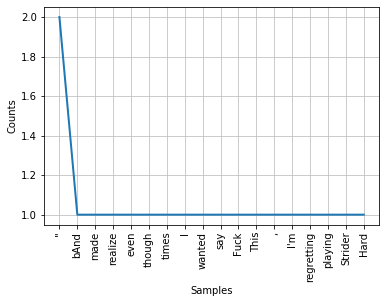

In [19]:
fdist = FreqDist(filtered_words)
vocabulary = fdist.keys()
for i in vocabulary:
    print(i)
fdist.plot(20)